In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import stylia as st
from stylia import (
    ONE_COLUMN_WIDTH,
    TWO_COLUMNS_WIDTH,
    NamedColorMaps,
    NamedColors,
    ContinuousColorMap,
)
from sklearn.manifold import TSNE

data_dir = "../data/"


def load_data(model_id):
    df_0 = pd.read_csv(os.path.join(data_dir, "all_molecules.csv"))
    df_1 = pd.read_csv(os.path.join(data_dir, "all_molecules_{0}.csv".format(model_id)))
    columns = list(df_1.columns)[2:]
    return pd.concat([df_0, df_1[columns]], axis=1)


colors = NamedColors()
npc = colors.get("green")
spc = colors.get("purple")
red = colors.get("red")
blue = colors.get("blue")

# Figure 1A,B,C

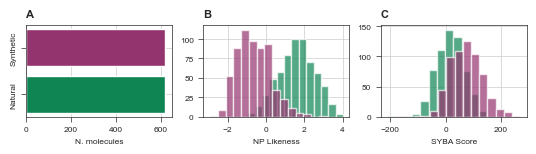

In [2]:
dfa = pd.read_csv(os.path.join(data_dir, "all_molecules.csv"))
dfb = load_data("eos8ioa")  # NP score
dfc = load_data("eos7pw8")

fig, axs = st.create_figure(1, 3, width=TWO_COLUMNS_WIDTH * 0.75, height=1.5)

ax = axs.next()
st.label(ax, title="", xlabel="N. molecules", ylabel="", abc="A")
category_counts = dfa["category"].value_counts()
ax.barh(
    [0, 1],
    [len(dfa[dfa["category"] == "natural"]), len(dfa[dfa["category"] == "synthetic"])],
    color=[npc, spc],
)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Natural", "Synthetic"], rotation=90, va="center")

ax = axs.next()
st.label(ax, title="", xlabel="NP Likeness", ylabel="", abc="B")
ax.hist(
    dfb[dfb["category"] == "natural"]["nplikeness"],
    alpha=0.7,
    label="Natural",
    color=npc,
    bins=15,
)
ax.hist(
    dfb[dfb["category"] == "synthetic"]["nplikeness"],
    alpha=0.7,
    label="Synthetic",
    color=spc,
    bins=15,
)

ax = axs.next()
st.label(ax, title="", xlabel="SYBA Score", ylabel="", abc="C")
ax.hist(
    dfc[dfc["category"] == "natural"]["sy_sa"],
    alpha=0.7,
    label="natural",
    color=npc,
    bins=15,
)
ax.hist(
    dfc[dfc["category"] == "synthetic"]["sy_sa"],
    alpha=0.7,
    label="synthetic",
    color=spc,
    bins=15,
)

plt.tight_layout()
st.save_figure("../figures/f1_abc.png")
st.save_figure("../figures/f1_abc.pdf")

# Figure 1, DE

In [3]:
def plot_tsne(data):
    df = data.dropna()
    df = df.reset_index(drop=True)
    descs = df.iloc[:, 4:]
    descs_array = descs.values
    tsne = TSNE(n_components=2, perplexity=30)
    tsne_results = tsne.fit_transform(descs_array)
    nat_idx = df[df["category"] == "natural"].index
    syn_idx = df[df["category"] == "synthetic"].index
    tsne_nat = tsne_results[nat_idx]
    tsne_syn = tsne_results[syn_idx]
    ax.scatter(
        tsne_nat[:, 0], tsne_nat[:, 1], alpha=0.7, label="natural", color=npc, s=0.7
    )
    ax.scatter(
        tsne_syn[:, 0], tsne_syn[:, 1], alpha=0.7, label="synthetic", color=spc, s=0.7
    )

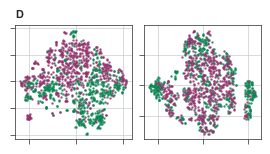

In [4]:
fig, axs = st.create_figure(1, 2, width=(TWO_COLUMNS_WIDTH * 0.75) / 2, height=1.5)

ax = axs.next()
ax.tick_params(labelbottom=False, labelleft=False)
st.label(ax, title="", xlabel="", ylabel="", abc="D")
df = load_data("eos39co")
plot_tsne(df)

ax = axs.next()
ax.tick_params(labelbottom=False, labelleft=False)
st.label(ax, title="", xlabel="", ylabel="", abc="")
df = load_data("eos24ur")
plot_tsne(df)

plt.tight_layout()
st.save_figure("../figures/f1_d.png")
st.save_figure("../figures/f1_d.pdf")

In [6]:
# parse pca components contribution
import numpy as np
df = pd.read_csv("../data/original/PCA/pca_contributions.csv")
df["PCA1_abs"] = [np.abs(x) for x in df["PCA1contribution"].tolist()]
df["PCA2_abs"] = [np.abs(x) for x in df["PCA2contribution"].tolist()]
df_ = df.sort_values(by="PCA2_abs", ascending=False)
top = df_.head(5)
top

,Property,PCA1contribution,PCA2contribution,PCA1_abs,PCA2_abs
12,FCharge,0.009667,-0.400789,0.009667,0.400789
19,a_base,0.094343,-0.243719,0.094343,0.243719
17,a_acid,0.037533,0.157487,0.037533,0.157487
3,AM1_LUMO,0.001378,0.157164,0.001378,0.157164
38,rsynth,-0.092692,-0.104468,0.092692,0.104468


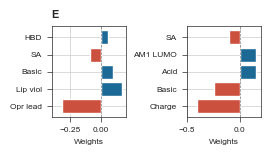

In [9]:
# parse pca components contribution
import numpy as np

df = pd.read_csv("../data/original/PCA/pca_contributions.csv")
df["PCA1_abs"] = [np.abs(x) for x in df["PCA1contribution"].tolist()]
df["PCA2_abs"] = [np.abs(x) for x in df["PCA2contribution"].tolist()]
names_map = {
    "opr_leadlike": "Opr lead",
    "lip_violation": "Lip viol",
    "a_base": "Basic",
    "rsynth": "SA",
    "a_don": "HBD",
    "FCharge": "Charge",
    "a_acid": "Acid",
    "AM1_LUMO": "AM1 LUMO",    
}

fig, axs = st.create_figure(1, 2, width=(TWO_COLUMNS_WIDTH * 0.75) / 2, height=1.5)

ax = axs.next()
df_ = df.sort_values(by="PCA1_abs", ascending=False)
top = df_.head(5)
bars = ax.barh(
    [names_map[x] for x in top["Property"].tolist()],
    top["PCA1contribution"],
    color=[red if x < 0 else blue for x in top["PCA1contribution"]],
)
ax.axvline(x=0, color="grey", linestyle="--")
ax.set_xlim(-0.4, 0.2)
st.label(ax, title="", xlabel="Weights", ylabel="", abc="E")

ax = axs.next()
df_ = df.sort_values(by="PCA2_abs", ascending=False)
top = df_.head(5)
bars = ax.barh(
    [names_map[x] for x in top["Property"].tolist()],
    top["PCA2contribution"],
    color=[red if x < 0 else blue for x in top["PCA2contribution"]],
)
ax.axvline(x=0, color="grey", linestyle="--")
ax.set_xlim(-0.5, 0.2)
st.label(ax, title="", xlabel="Weights", ylabel="", abc="")

plt.tight_layout()
#st.save_figure("../figures/f1_e.png")

# Figure 1G

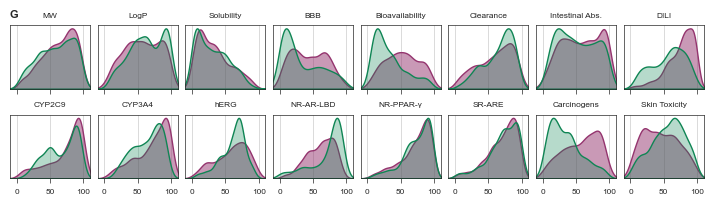

In [10]:
df = load_data("eos7d58")
selected_props = {
    "molecular_weight": "MW",
    "logP": "LogP",
    "Solubility_AqSolDB": "Solubility",
    "BBB_Martins": "BBB",
    "Bioavailability_Ma": "Bioavailability",
    "Clearance_Hepatocyte_AZ": "Clearance",
    "HIA_Hou": "Intestinal Abs.",
    "DILI": "DILI",
    "CYP2C9_Veith": "CYP2C9",
    "CYP3A4_Veith": "CYP3A4",
    "hERG": "hERG",
    "NR-AR-LBD": "NR-AR-LBD",
    "NR-PPAR-gamma": "NR-PPAR-γ",
    "SR-ARE": "SR-ARE",
    "Carcinogens_Lagunin": "Carcinogens",
    "Skin_Reaction": "Skin Toxicity",
}

cols_plot = []
for c in selected_props.keys():
    cols_plot += [c + "_drugbank_approved_percentile"]

fig, axs = st.create_figure(2, 8, width=TWO_COLUMNS_WIDTH, height=2)

# Ensure there are as many axes as columns
for i, column in enumerate(cols_plot):
    if i == 0:
        abc = "G"
    else:
        abc = ""
    ax = axs.next()
    sns.kdeplot(
        df[df["category"] == "synthetic"][column],
        ax=ax,
        alpha=0.5,
        color=spc,
        fill=True,
    )
    sns.kdeplot(
        df[df["category"] == "natural"][column], ax=ax, alpha=0.3, color=npc, fill=True
    )
    title = selected_props[column.replace("_drugbank_approved_percentile", "")]
    st.label(ax, title=title, xlabel="", ylabel="", abc=abc)
    ax.set_xlim(-10, 110)
    ax.set_xticks([0, 50, 100])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    if i < 8:
        ax.tick_params(labelbottom=False, labelleft=False)
    else:
        ax.tick_params(labelleft=False)


plt.tight_layout()  # Adjust subplots to fit in figure area.
st.save_figure("../figures/f1_g.png")
st.save_figure("../figures/f1_g.pdf")

# Figure 1F


In [11]:
from rdkit import Chem

df = pd.read_csv("../data/all_scaffolds.csv")
def filter_by_heavy_atoms(df, min_heavy_atoms=5):
    def count_heavy_atoms(smiles):
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() > 1)
        else:
            return 0

    filtered_df = df[df["smiles"].apply(count_heavy_atoms) >= min_heavy_atoms]
    return filtered_df

df = filter_by_heavy_atoms(df, 5)
df = df[df["db_abs_freq"] <= 3]

In [12]:
def top_smiles_by_rel_freq(df, n=10):
    top_np = df.nlargest(n, "np_rel_freq")
    top_sd = df.nlargest(n, "sd_rel_freq")
    return top_np, top_sd


top_np, top_sd = top_smiles_by_rel_freq(df, 20)

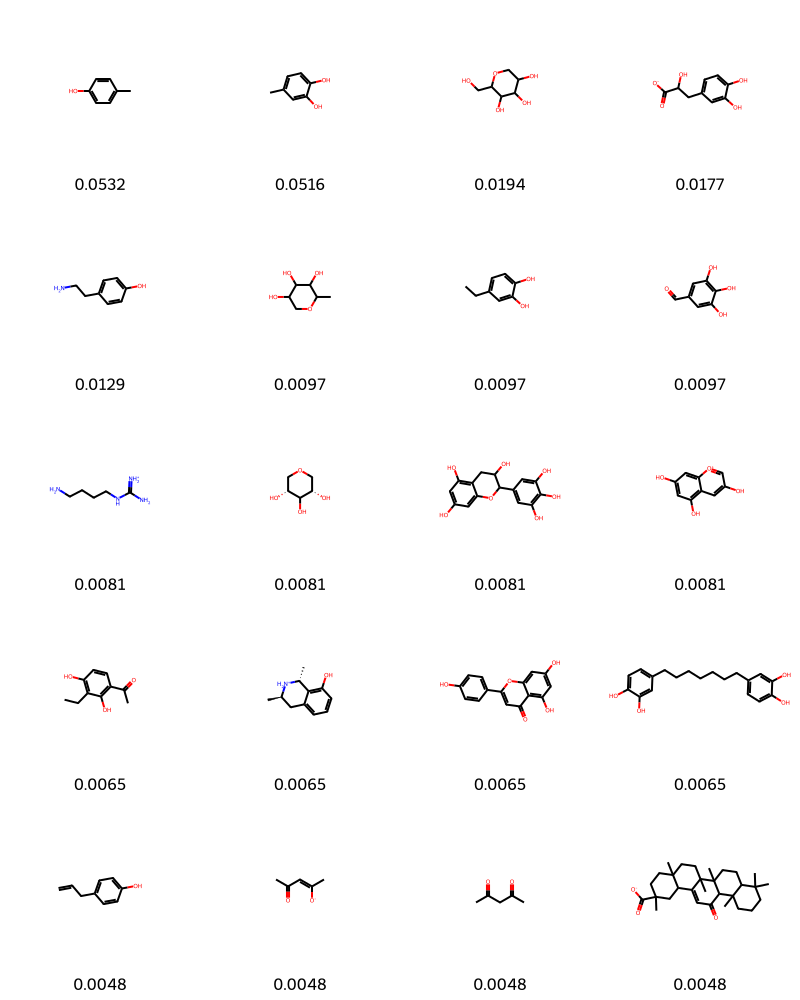

In [13]:
from rdkit.Chem import Draw
from rdkit import Chem

mols = [Chem.MolFromSmiles(smiles) for smiles in top_np["smiles"]]
mols = [mol for mol in mols if mol is not None]
# legends = [f"np_freq: {row['np_rel_freq']:.4f}\nsd_freq: {row['sd_rel_freq']:.4f}\ndb_freq: {row['db_rel_freq']:.4f}" for i, row in top_np.iterrows()]
img = Draw.MolsToGridImage(
    mols,
    molsPerRow=4,
    subImgSize=(200, 200),
    legends=[f"{x:.4f}" for x in top_np["np_rel_freq"]],
)
img

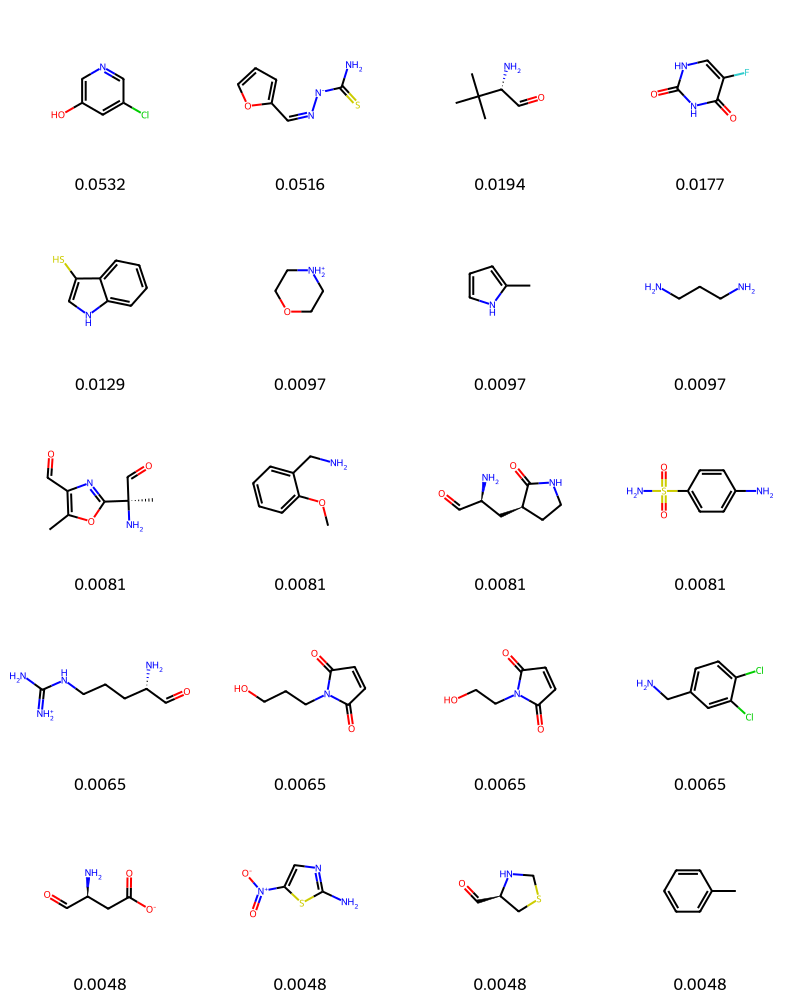

In [14]:
mols = [Chem.MolFromSmiles(smiles) for smiles in top_sd["smiles"]]
mols = [mol for mol in mols if mol is not None]
# legends = [f"np_freq: {row['np_rel_freq']:.4f}\nsd_freq: {row['sd_rel_freq']:.4f}\ndb_freq: {row['db_rel_freq']:.4f}" for i, row in top_sd.iterrows()]
img = Draw.MolsToGridImage(
    mols,
    molsPerRow=4,
    subImgSize=(200, 200),
    legends=[f"{x:.4f}" for x in top_np["np_rel_freq"]],
)
img

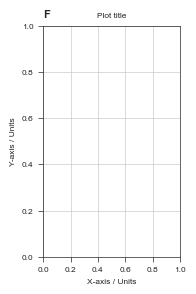

In [72]:
fig, axs = st.create_figure(1, 1, width=TWO_COLUMNS_WIDTH * 0.25, height=3)
ax = axs.next()
st.label(ax, abc="F")
plt.savefig("../figures/f1_f.png", dpi=300)